# Titanic Survival Analysis

## Overview
This project explores survival patterns among Titanic survivors using data analysis and machine learning. We clean the dataset, visualize survival trends, and build a model using **RandomForestClassifier**

## DataSet
The dataset includes details like age, gender, ticket class, fare price, and survival outcomes. Our goal is to identify which factors had the most impact on survival.


## Data Loading and Initial Exploration
First we load the data, inspect its structure, and check for missing values.
## Steps
* Import the necessary libraries(e.g.pandas)
* Load the dataset ('titanic.csv')
* Check column data types
* Identify missing values

In [1]:
import pandas as pd

# Load the Dataset

In [2]:
df = pd.read_csv('titanic.csv')

# Titanic Data Exploration

## Dataset Shape
Displays the number of rows and columns in the dataset

In [3]:
df.shape

(891, 12)

## Summary Statistics
Provides key metrics like mean, standard deviation, and quartiles for numeric features.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Column Types
Shows data types for each feature and helps identify non-numeric columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## First Few Rows
Gives a sample of the dataset to understand content and layout.

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Number of Null Values
Identifies missing values in each column to guide the cleaning process.

In [7]:
print('\nMissing values per column:')


Missing values per column:


In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Cleaning and Feature Engineering

### Handling Missing Values
To insure model accuracy and consistency we addressed missing data:
* **Age**:  Replaced missing values with the column's **mean**
* **Cabin**:  Extracted the  **first letter** to created a simple **Cabin_Letter**
* **Categorical Columns**:  ('Sex','Embarked'):  applied **one-hot coding** using pd.get_dummies()

### Feature Creation
We engineered several features to uncover survival patterns
* **Cabin_Letter**:  isolated the **first character** from 'Cabin' to capture possible deck locations.
*  **AgeGroup**:  binned Age groups in logical categories(Child, Teen, Young Adult, Middle-Aged, Senior, Elder, Very Elder)
*  **FareClass**:  combined 'Fare' * 'Pclass' to represent the **economic weight** of a passenger's ticket.
*  **FamilySize**:  summed 'Sibsp + Parch + 1' to represent the **total number of family members aboard**.
*  **FareClassBin** binned FareClass groups in categories
 
Each of these features was designed to surface deeper patterns in passenger survival, and to provide our model with more meaningfull input.

## Fill Missing Values:

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin_Letter'] = df['Cabin'].astype(str).str[0]
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Feature engineering

In [10]:
df['Cabin_Letter'] = df['Cabin'].astype(str).str[0]
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FareClass'] = df['Fare'] * df['Pclass']
df['AgeGroup'] = pd.cut(df['Age'],
    bins = [0, 12, 18, 35, 50, 65, 75, 85, 90],
    labels = ['Child', 'Teen', 'Young Adult','Adult', 'Middle-Aged', 'Senior','Elder', '90+'],
    right = False
)
df['FareClassBin'] = pd.cut(df['FareClass'],
    bins = [0, 50, 100, 150, 200, df['FareClass'].max() + 1],
    labels = ['0 - 50', '50 - 100', '100 -150', '150 - 200', '200 +'],
    include_lowest = True
)
df['Pclass_Age'] = df['Pclass'] * df['Age']

# Grouped Survival Rate by AgeGroup

In [11]:
print('\nSurvival Rate by Age Group')
print(df.groupby('AgeGroup', observed = True)['Survived'].mean())


Survival Rate by Age Group
AgeGroup
Child          0.573529
Teen           0.488889
Young Adult    0.344383
Adult          0.416149
Middle-Aged    0.412698
Senior         0.000000
Elder          1.000000
Name: Survived, dtype: float64


# Grouped Survival Rate by Family Size

In [12]:
print('\nSurvival Rate by Family Size')
print(df.groupby('FamilySize')['Survived'].mean())


Survival Rate by Family Size
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


# Grouped Survival Rate by Sex and Pclass

In [13]:
print('\nSurvival Rate by Sex and Pclass')
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


Survival Rate by Sex and Pclass
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


# Drop SibSp and Parch since we've combined them into Family Size

In [14]:
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

# Preview Updaged Data Frame

In [15]:
print('\nUpdated Data Frame Preview:')
print(df.head())


Updated Data Frame Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare    Cabin Embarked Cabin_Letter  FamilySize  \
0         A/5 21171   7.2500  Unknown        S            U           2   
1          PC 17599  71.2833      C85        C            C           2   
2  STON/O2. 3101282   7.9250  Unknown        S            U           1   
3            113803  53.1000     

## Exploratory Data Analysis
## Key Insights

We use visualizations to explore survival patterns so the matplotlib and seaborn libraries are imported

* FareClass vs. Survival (Boxplot) -> higher FareClass improves survival odds.
* FamilySize and Pclass vs. Survival (Heatmap) -> extreme Family sizes have lower survival rates
* Pclass vs. Survival (Barplot) -> first class passengers have higher survival rates
* FareClassBin and Sex vs. Survival(Barplot) -> females dominated most bins with higher survival rates

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot: FareClass Vs. Survival

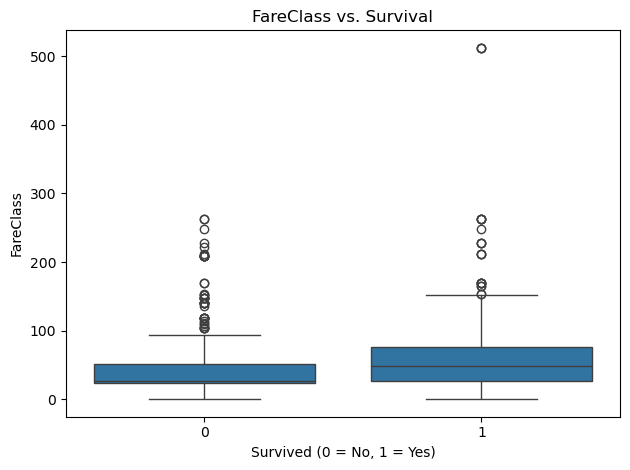

In [17]:
sns.boxplot(x = df['Survived'], y = df['FareClass'], data = df)
plt.title('FareClass vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('FareClass')
plt.tight_layout()
plt.show()

# Heat Map: Survival Rate by Family Size and Pclass 

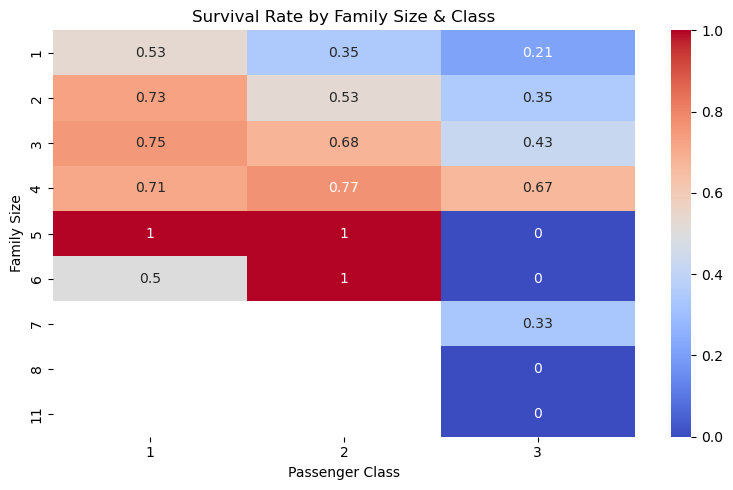

In [18]:
family_class_survival = df.pivot_table(
    values = 'Survived',
    index = 'FamilySize',
    columns = 'Pclass',
    aggfunc = 'mean'
)
plt.figure(figsize = (8, 5))
sns.heatmap(family_class_survival, cmap = 'coolwarm', annot = True)
plt.title('Survival Rate by Family Size & Class')
plt.xlabel('Passenger Class')
plt.ylabel('Family Size')
plt.tight_layout()
plt.show()

# Bar Plot: Survival Rate by Passenger Class

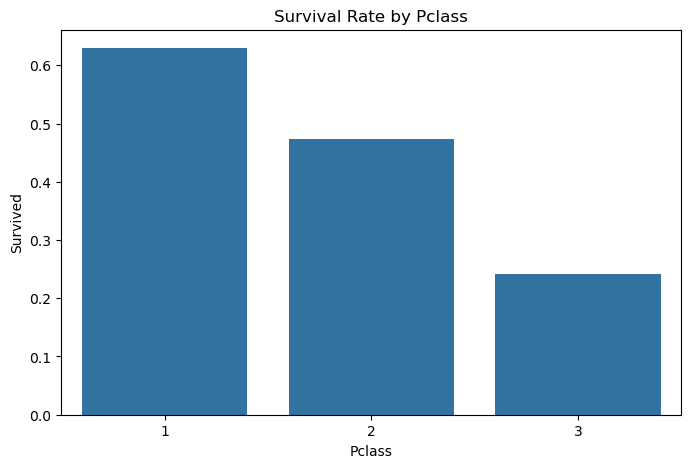

In [19]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df, x = 'Pclass', y = 'Survived', errorbar = None)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

# Bar Plot: Survival Rate by FareClassBin and Sex

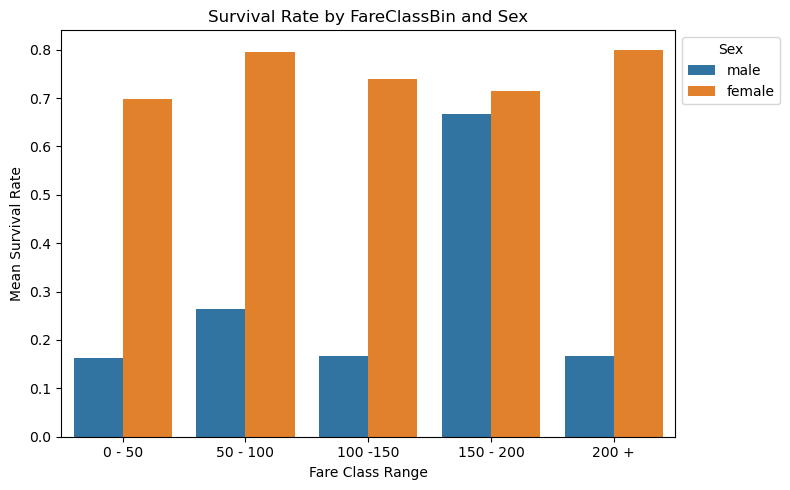

In [20]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'FareClassBin', y = 'Survived', hue = 'Sex', errorbar = None)
plt.title('Survival Rate by FareClassBin and Sex')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Fare Class Range')
plt.legend(title = 'Sex', loc = 'upper left', bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()


## Machine Learning -- Random Forest

## Steps:
1. Import libaries
2. Define X(features) and y(target variable 'Survived')
3. Train-test split(80,20)
4. Train RandomForestClassifier(n_estimators = 100)
5. Evaluate model(accuracy, feature importance, confusion matrix)

In [21]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# One-hot encode categorical variables

In [22]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)

# Drop columns that won't be used in modeling

In [23]:
df.drop(['Name', 'Ticket', 'Cabin', 'Cabin_etter'], axis = 1, inplace = True, errors = 'ignore')

# Define features and target

In [66]:
X = df[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Feature scaling(optional for Random Forest but good practice)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model

In [27]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [28]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Predict and evaluate

In [29]:
y_pred = model.predict(X_test_scaled)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.79


 # Feature Importance

In [31]:
importances = pd.Series(model.feature_importances_, index = X.columns)
importances = importances.sort_values(ascending = False)

In [32]:
print('\nTop Ten Feature Importances:')
print(importances.head(10))


Top Ten Feature Importances:
Fare          0.309435
Age           0.288196
Sex_male      0.273987
Pclass        0.093789
Embarked_S    0.022678
Embarked_Q    0.011916
dtype: float64


# Confusion Matrix

In [33]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[108  26]
 [ 21  68]]


# Preview the Updated DateFrame

In [34]:
print('\nUpdated DataFrame Preview: ')
print(df.head())


Updated DataFrame Preview: 
   PassengerId  Survived  Pclass   Age     Fare Cabin_Letter  FamilySize  \
0            1         0       3  22.0   7.2500            U           2   
1            2         1       1  38.0  71.2833            C           2   
2            3         1       3  26.0   7.9250            U           1   
3            4         1       1  35.0  53.1000            C           2   
4            5         0       3  35.0   8.0500            U           1   

   FareClass     AgeGroup FareClassBin  Sex_male  Embarked_Q  Embarked_S  
0    21.7500  Young Adult       0 - 50      True       False        True  
1    71.2833        Adult     50 - 100     False       False       False  
2    23.7750  Young Adult       0 - 50     False       False        True  
3    53.1000        Adult     50 - 100     False       False        True  
4    24.1500        Adult       0 - 50      True       False        True  


# Print Model Summary

In [35]:
print('\nRandom Forest Model: ')
print(model)


Random Forest Model: 
RandomForestClassifier(random_state=42)


# Feature Importance from Random Forest

In [36]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance = dict(zip(feature_names, importances))
print(feature_importance)

{'Pclass': 0.09378873056302917, 'Age': 0.2881958826192973, 'Fare': 0.3094350016451745, 'Sex_male': 0.2739867920390697, 'Embarked_Q': 0.01191585964869029, 'Embarked_S': 0.022677733484739053}


# Sort Features by Importance

In [38]:
sorted_features = sorted(feature_importance.items(), key = lambda x: x[1], reverse = True)
features, scores = zip(*sorted_features)                         

# Visualize Importance

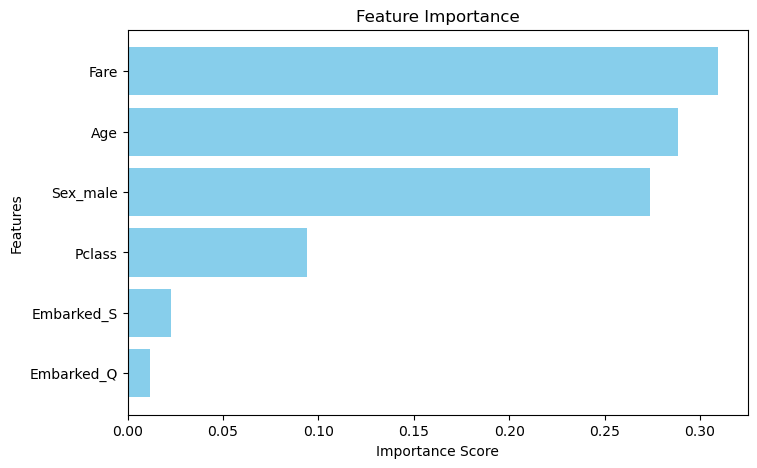

{'Pclass': 0.09378873056302917, 'Age': 0.2881958826192973, 'Fare': 0.3094350016451745, 'Sex_male': 0.2739867920390697, 'Embarked_Q': 0.01191585964869029, 'Embarked_S': 0.022677733484739053}


In [39]:
plt.figure(figsize=(8, 5))
plt.barh(features, scores, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

print(feature_importance)

# Plot Feature Importance

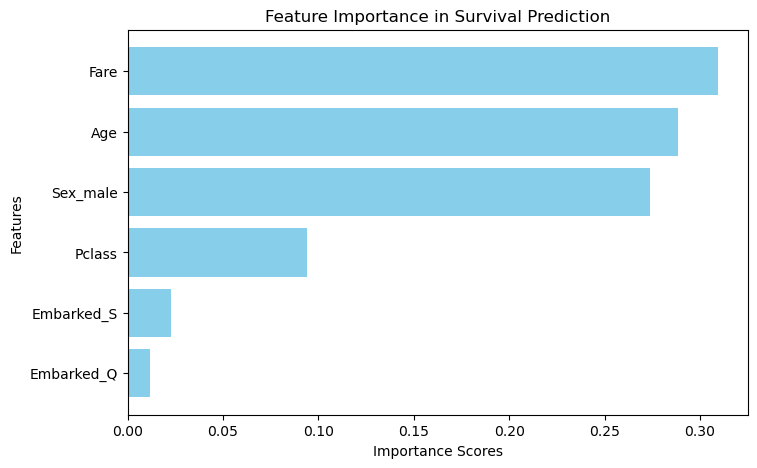

In [40]:
plt.figure(figsize = (8, 5))
plt.barh(features, scores, color = 'skyblue')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance in Survival Prediction')
plt.gca().invert_yaxis()
plt.show()

# Print Original Feature Importances

In [42]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance = dict(zip(feature_names, importances))
print('\nOriginal Feature Importances')
print(feature_importance)


Original Feature Importances
{'Pclass': 0.09378873056302917, 'Age': 0.2881958826192973, 'Fare': 0.3094350016451745, 'Sex_male': 0.2739867920390697, 'Embarked_Q': 0.01191585964869029, 'Embarked_S': 0.022677733484739053}


# Feature Engineering Combine Pclass and Age

In [43]:
df['Pclass_Age'] = df['Pclass'] * df['Age']

# Define New Feature Set

In [68]:
X = df[['Pclass_Age', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Train/Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Model On New Features

In [51]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance After Feature Engineering

In [52]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance = dict(zip(feature_names, importances))
print('Feature Importances After Adding Pclass_Age')
print(feature_importance)

Feature Importances After Adding Pclass_Age
{'Pclass_Age': 0.33663770844073054, 'Fare': 0.3697399753134863, 'Sex_male': 0.2622189010754935, 'Embarked_Q': 0.01011406990599397, 'Embarked_S': 0.02128934526429571}


# Visualize Updated Feature Importance

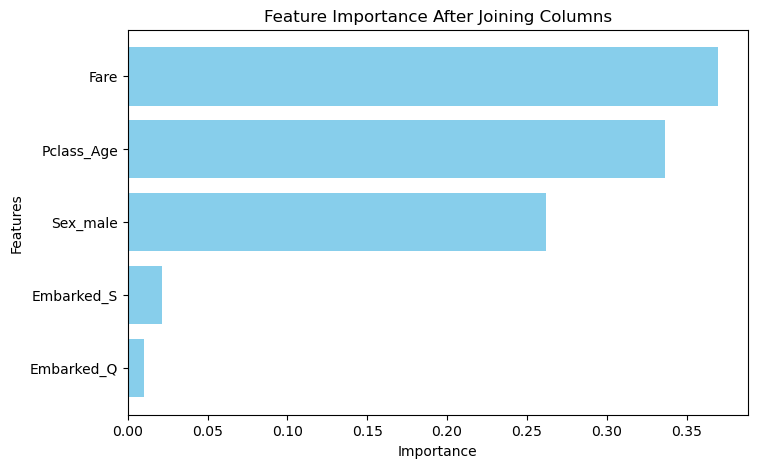

In [53]:
sorted_features = sorted(feature_importance.items(), key = lambda x: x[1], reverse = True)
features, scores = zip(*sorted_features)
plt.figure(figsize = (8, 5))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance After Joining Columns')
plt.gca().invert_yaxis()
plt.show()

# Prepare For Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 5, 10],      # Tree depth
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples in a leaf
}

# Initialize Random Forest
model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [55]:
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

# Evaluation

In [56]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.2f}")

Tuned Model Accuracy: 0.81


In [57]:
y_pred = best_model.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[92 13]
 [21 53]]


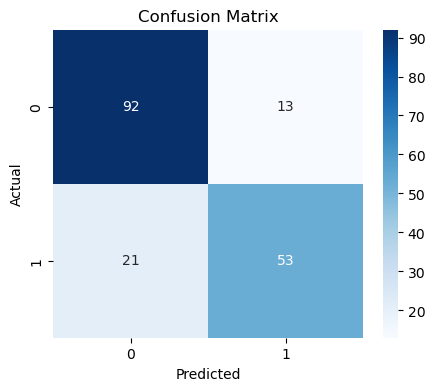

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.80


In [61]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [62]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.76


In [63]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities of survival

In [64]:
import numpy as np

threshold = 0.60  # You can experiment with values like 0.40 or 0.70
y_pred_threshold = np.where(y_probs >= threshold, 1, 0)  # Convert probabilities to classifications

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Threshold: 0.6
Precision: 0.88, Recall: 0.68, F1-Score: 0.76


## Conclusion and Next Steps

## Findings

* FareClass and Pclass strongly influenced survival
* Family Size and mixed effects -- both very big and very small faced lower survival rates.
* Random Forest provided strong predictions, but hyperparameter tuning could improve accuracy

### Future Enhancements:

* hyperparameter tuning(GridSearchCV)
* try alternative models(i.e. Gradient Boosting)
* deploy the model for interactive predictions

